In [88]:
import numpy as np
import importlib
import PaulTrap
import matplotlib.pyplot as plt
import os
importlib.reload(PaulTrap)
from PaulTrap import PaulTrap


initialize data for the trap

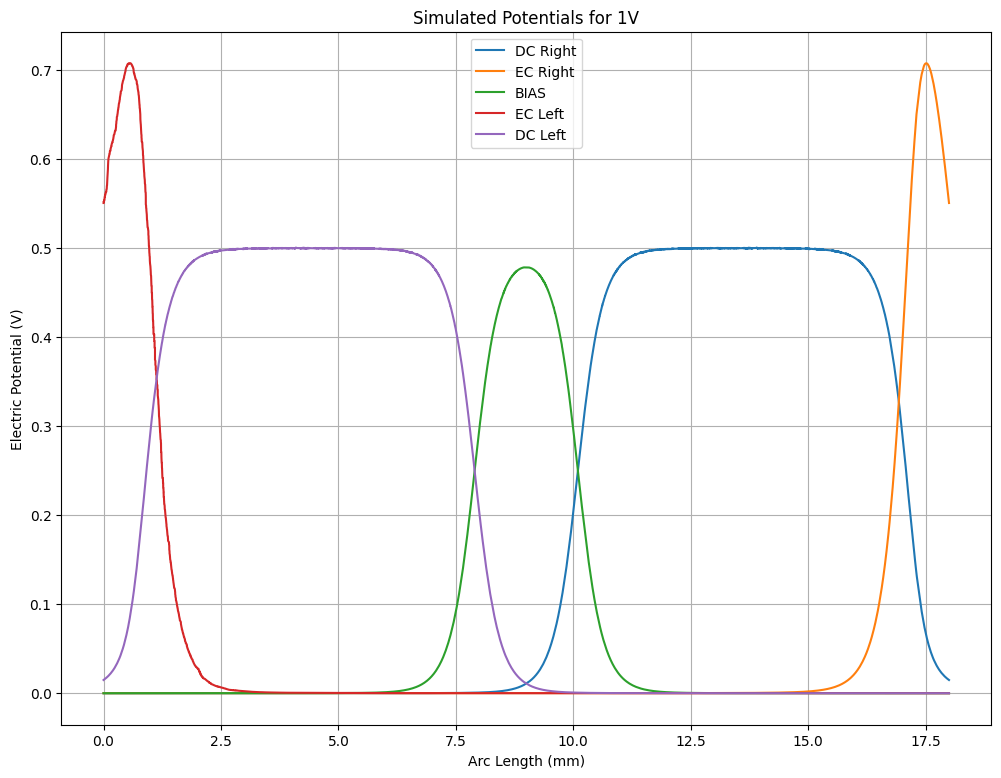

In [63]:


# Get the absolute path of the current script
script_dir = os.getcwd()

# Construct absolute paths for the files
file_EC = os.path.join(script_dir, 'electrodes responses\Shuttling Endcap Smoothed.txt')
file_DC = os.path.join(script_dir, 'electrodes responses\Shuttling DC Smoothed.txt')
file_BIAS = os.path.join(script_dir, 'electrodes responses\Shuttling BIAS Smoothed.txt')

# Load the data using the absolute paths
data_EC = np.loadtxt(file_EC, skiprows=8)
data_DC = np.loadtxt(file_DC, skiprows=8)
data_BIAS = np.loadtxt(file_BIAS, skiprows=8)

# Reading the data and extracting columns
arc_length_EC = data_EC[:, 0]
electric_potential_EC_R = data_EC[:, 1]
electric_potential_EC_L = electric_potential_EC_R[::-1]

arc_length_DC_R = data_DC[:, 0]
electric_potential_DC_R = data_DC[:, 1]
electric_potential_DC_L = electric_potential_DC_R[::-1]
diff = np.diff(arc_length_DC_R)
arc_length_DC_L = np.zeros(len(arc_length_DC_R))
diff = diff[::-1]
for i in range(1, len(arc_length_DC_R)):
    arc_length_DC_L[i] = arc_length_DC_L[i-1] + diff[i-1]

arc_length_BIAS = data_BIAS[:, 0]
electric_potential_BIAS = data_BIAS[:, 1]

# Plot the data
plt.figure(figsize=(12, 9))
plt.plot(arc_length_DC_R, electric_potential_DC_R, label='DC Right')
plt.plot(arc_length_EC, electric_potential_EC_R, label='EC Right')
plt.plot(arc_length_BIAS, electric_potential_BIAS, label='BIAS')
plt.plot(arc_length_EC, electric_potential_EC_L, label='EC Left')
plt.plot(arc_length_DC_L, electric_potential_DC_L, label='DC Left')
plt.title('Simulated Potentials for 1V')
plt.xlabel('Arc Length (mm)')
plt.ylabel('Electric Potential (V)')
plt.legend()
plt.grid(True)
plt.show()



now we use the fact that we created a class to create a trap object

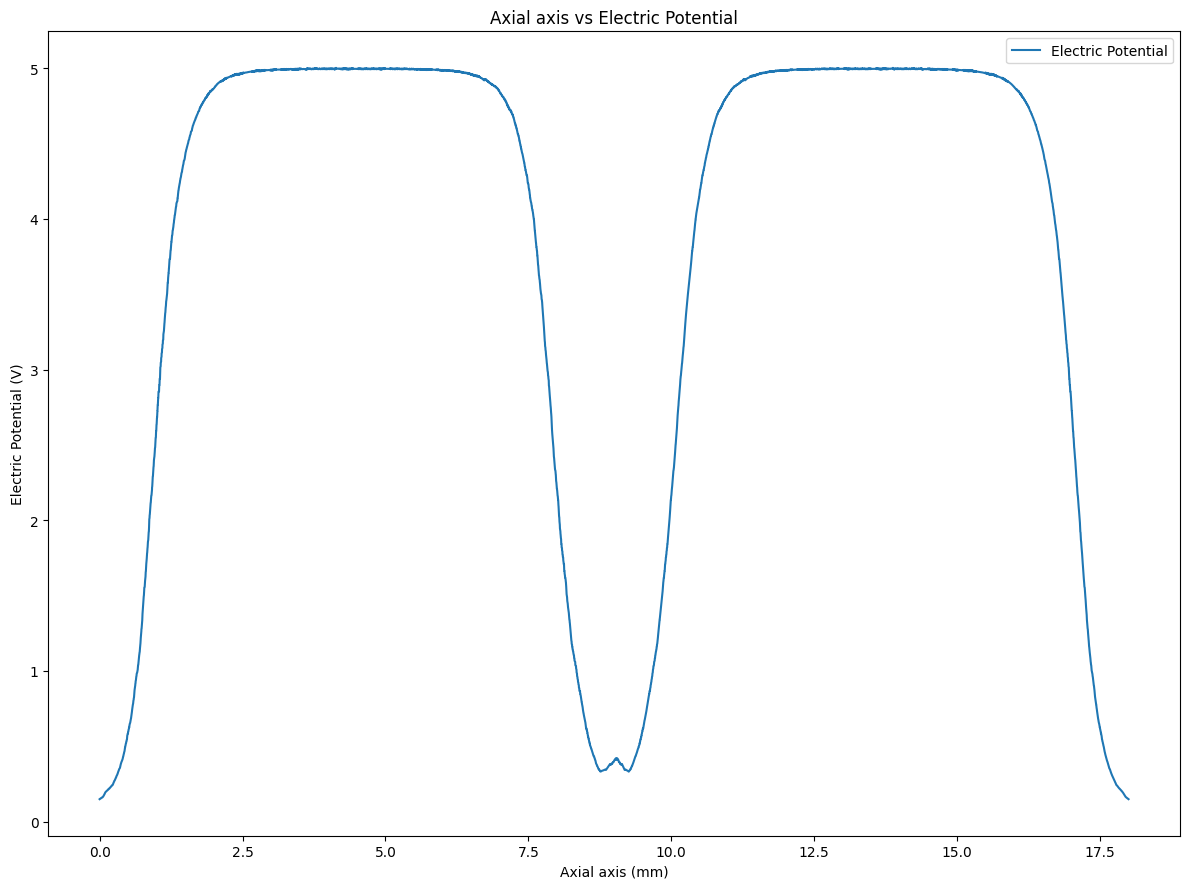

In [89]:
u = 1.66e-27 # atomic mass unit in kg
m = 40 # atomic mass
trap = PaulTrap(mass=m*u)

trap.set_voltages(V_EC_L=0,
                  V_DC_L=10,
                  V_BIAS=0,
                  V_DC_R=10,
                  V_EC_R=0)

trap.plot_trap_potential()



Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\itama\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\itama\OneDrive\Documents\GitHub\Ziv-Meir-moleQulab\Trap simulation\PaulTrap.py", line 107, in <lambda>
    command=lambda value, idx=i: update_potential(idx, value))
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\itama\OneDrive\Documents\GitHub\Ziv-Meir-moleQulab\Trap simulation\PaulTrap.py", line 81, in update_potential
    ax.clear()
    ^^
NameError: cannot access free variable 'ax' where it is not associated with a value in enclosing scope
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\itama\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\itama\OneDrive\Docum

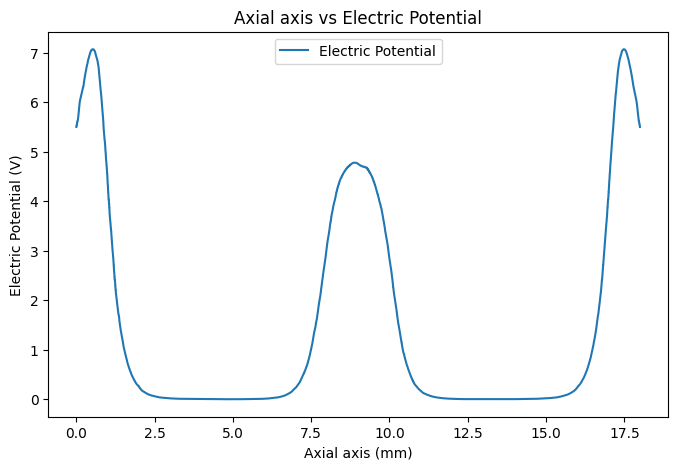

In [80]:
trap.interactive_trap_potential()